In [69]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

np.random.seed(0)

import warnings
warnings.filterwarnings('ignore')

### Plotting functions

In [123]:
# Some functions to plot our points and draw the lines
def plot_points(features, labels, fix_margins=True):
    X = np.array(features)
    y = np.array(labels)
    spam = X[np.argwhere(y==1)]
    ham = X[np.argwhere(y==0)]
    if fix_margins:
        plt.xlim(0, 11)
        plt.ylim(0, 11)
    plt.scatter([s[0][0] for s in spam],
                [s[0][1] for s in spam],
                s = 100,
                color = 'cyan',
                edgecolor = 'k',
                marker = '^')
    plt.scatter([s[0][0] for s in ham],
                [s[0][1] for s in ham],
                s = 100,
                color = 'red',
                edgecolor = 'k',
                marker = 's')
    plt.xlabel('Lottery')
    plt.ylabel('Sale')
    plt.legend(['Spam','Ham'])

def plot_model(X, y, model, ax=None, fix_margins=True):
    if ax is None:
        ax = plt.gca()
    
    X = np.array(X)
    y = np.array(y)
    
    # Plot points on the specific axes
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k', s=50)
    
    plot_step = 0.01
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    if fix_margins:
        x_min = 0
        y_min = 0
        x_max = 12
        y_max = 12
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Use ax.contourf and ax.contour instead of plt
    ax.contourf(xx, yy, Z, colors=['red', 'blue'], alpha=0.2, levels=range(-1, 2))
    ax.contour(xx, yy, Z, colors='k', linewidths=3)
    
    # Don't call plt.show() here - let the caller handle it

def plot_regressor(model, features, labels):
    x = np.linspace(0,85,1000)
    plt.scatter(features, labels)
    plt.plot(x, model.predict(x.reshape([-1,1])))
    plt.xlabel("Age")
    plt.ylabel("Days per week")
    plt.show()    



### The spam email dataset

In [3]:
emails = np.array([
    [7,8,1],
    [3,2,0],
    [8,4,1],
    [2,6,0],
    [6,5,1],
    [9,6,1],
    [8,5,0],
    [7,1,0],
    [1,9,1],
    [4,7,0],
    [1,3,0],
    [3,10,1],
    [2,2,1],
    [9,3,0],
    [5,3,0],
    [10,1,0],
    [5,9,1],
    [10,8,1],
])
spam_dataset = pd.DataFrame(data=emails, columns=["Lottery", "Sale", "Spam"])
spam_dataset.head()

,Lottery,Sale,Spam
0,7,8,1
1,3,2,0
2,8,4,1
3,2,6,0
4,6,5,1


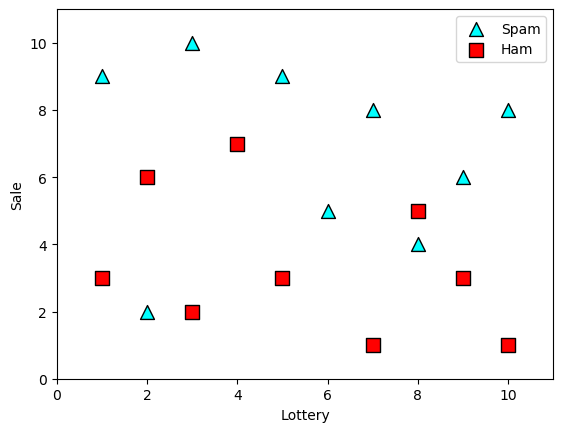

In [6]:
features = spam_dataset[['Lottery', 'Sale']]
labels = spam_dataset['Spam']
plot_points(features, labels)

In [7]:
decision_tree_classifier = DecisionTreeClassifier(random_state=0)
decision_tree_classifier.fit(features, labels)
decision_tree_classifier.score(features, labels)

1.0

### Training a decision tree

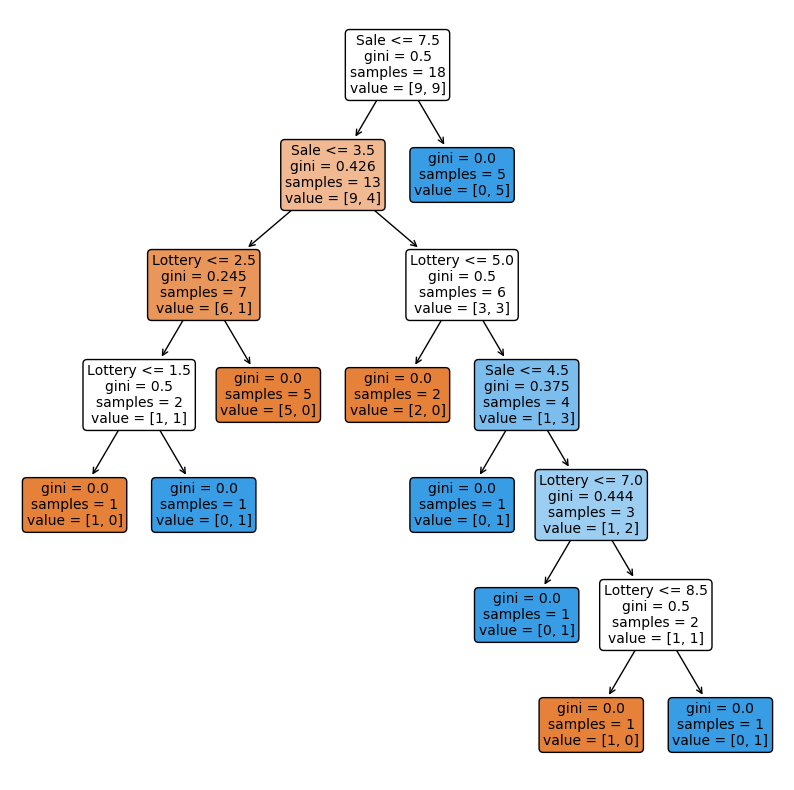

In [8]:
plt.figure(figsize=(10, 10))
tree.plot_tree(decision_tree_classifier, 
               rounded=True, 
               filled=True,                # Add colors to nodes
               fontsize=10, # Adjust font size
               feature_names=features.columns,
               )                
plt.show()

/opt/miniconda3/envs/lap/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


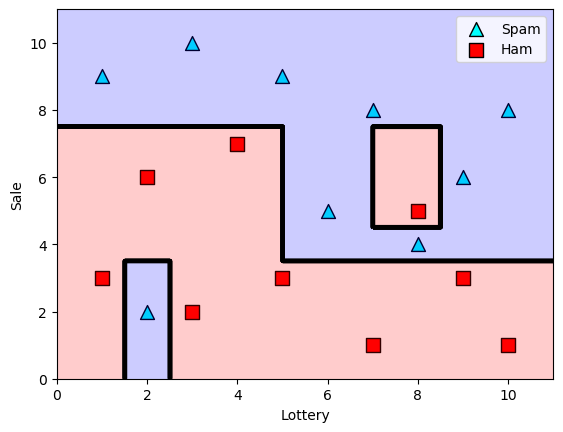

In [9]:
plot_model(features, labels, decision_tree_classifier)

- We can see that this decision tree splitts the data very well.  Even it classifies 2 outliers . A good model would treat it as outlier. 
- **So this model overfits**.

### Training a random forest by hand

- Lets divide the data into 3 batches, and train decisiontree for these 3 batches with depth =1 (very weak learner)

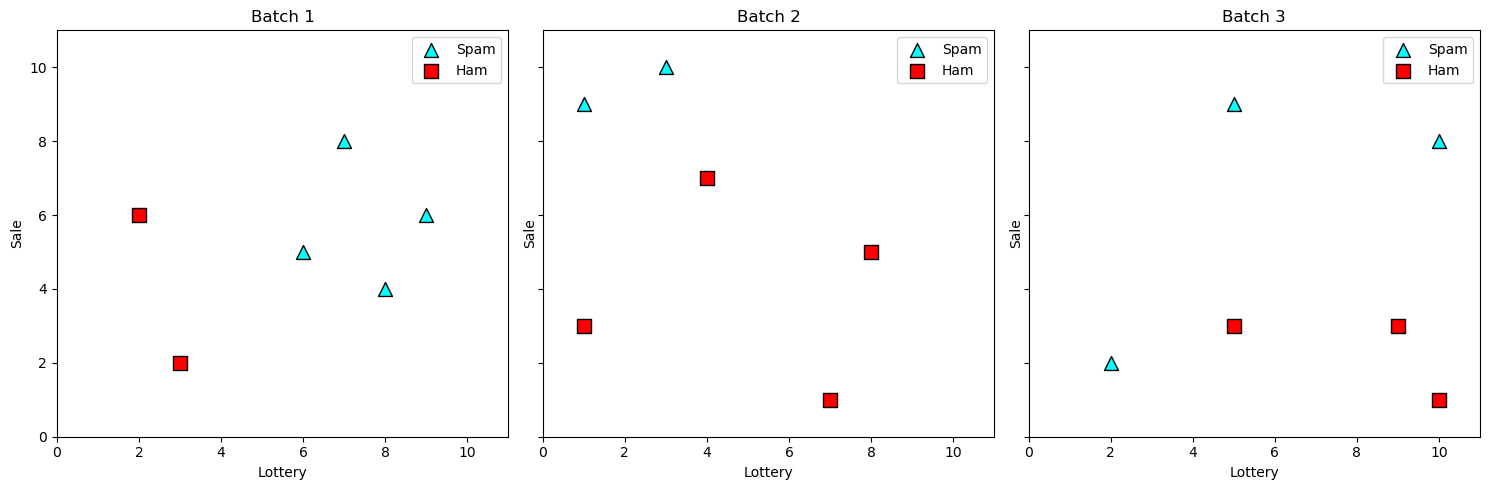

In [ ]:

# Create a figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)

# Bagging the data into three parts and plotting them separately
first_batch = spam_dataset.loc[[0,1,2,3,4,5]]
features1 = first_batch[['Lottery', 'Sale']]
labels1 = first_batch['Spam']
plt.sca(axes[0])  # Set the current axis
plot_points(features1, labels1)
axes[0].set_title("Batch 1")

second_batch = spam_dataset.loc[[6,7,8,9,10,11]]
features2 = second_batch[['Lottery', 'Sale']]
labels2 = second_batch['Spam']
plt.sca(axes[1])  # Set the current axis
plot_points(features2, labels2)
axes[1].set_title("Batch 2")

third_batch = spam_dataset.loc[[12,13,14,15,16,17]]
features3 = third_batch[['Lottery', 'Sale']]
labels3 = third_batch['Spam']
plt.sca(axes[2])  # Set the current axis
plot_points(features3, labels3)
axes[2].set_title("Batch 3")

plt.tight_layout()
plt.show()



Weak learner 1 training accuracy: 1.0
Weak learner 2 training accuracy: 1.0
Weak learner 3 training accuracy: 0.8333333333333334


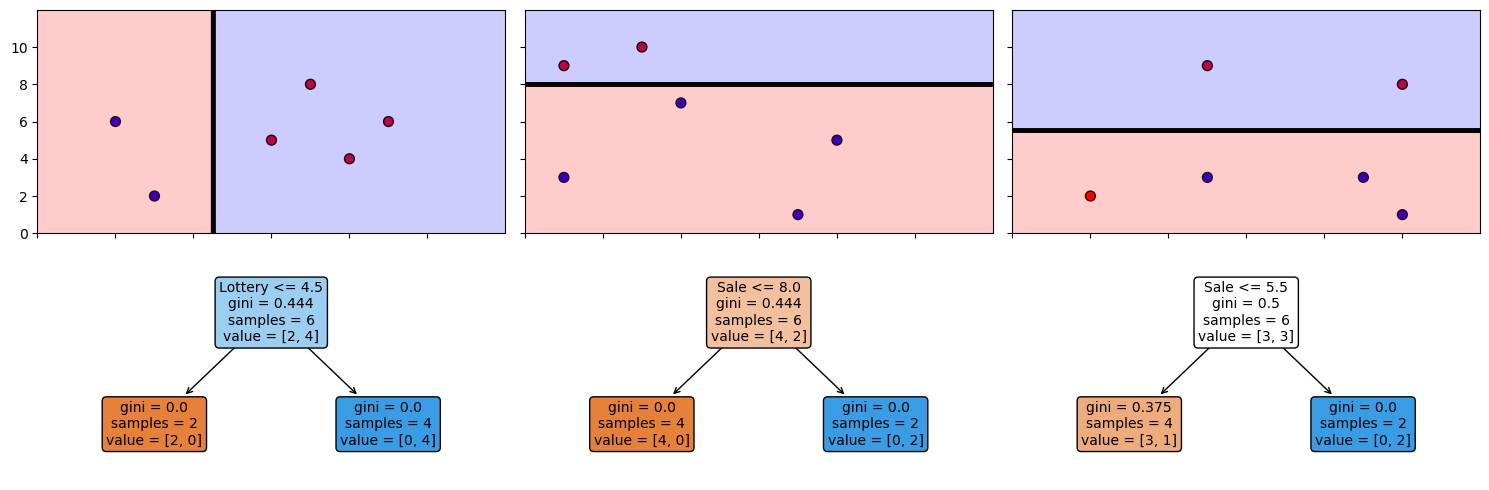

In [71]:
fig, axs = plt.subplots(2, 3, figsize=(15, 5), sharex=True, sharey=True)


dt1 = DecisionTreeClassifier(random_state=0, max_depth=1)
dt1.fit(features1, labels1)
print("Weak learner 1 training accuracy:", dt1.score(features1, labels1))
tree.plot_tree(dt1, rounded=True,filled=True,feature_names=features1.columns, fontsize=10, ax=axs[1,0])
plot_model(features1, labels1, dt1,ax=axs[0,0])

dt2 = DecisionTreeClassifier(random_state=0, max_depth=1)
dt2.fit(features2, labels2)
print("Weak learner 2 training accuracy:", dt2.score(features2, labels2))
tree.plot_tree(dt2, rounded=True, filled=True,feature_names=features2.columns,fontsize=10, ax=axs[1,1])
plot_model(features2, labels2, dt2, ax=axs[0,1])

dt3 = DecisionTreeClassifier(random_state=0, max_depth=1)
dt3.fit(features3, labels3)
print("Weak learner 3 training accuracy:", dt3.score(features3, labels3))
tree.plot_tree(dt3, rounded=True, filled=True,feature_names=features3.columns, fontsize=10, ax=axs[1,2])
plot_model(features3, labels3, dt3, ax=axs[0,2])

plt.tight_layout()
plt.show()

#### Training a random forest using sklearn
- If you use n_estimator = 1, then we will get a very week learner, by increasing this we will get multiple learner, So the combine score increases.


In [45]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=5, random_state=0, max_depth=1)
rf_classifier.fit(features, labels)
print("Ensemble training accuracy:", rf_classifier.score(features, labels))


Ensemble training accuracy: 0.8333333333333334


##### Normal DecisionTree overfits, but RandomForest doesn't overfit , it learn slowly, and avoid overfit.

In [48]:
decesion_tree_classifier = DecisionTreeClassifier(random_state=0)
decesion_tree_classifier.fit(features, labels)
print(f"Decision tree training accuracy: {decesion_tree_classifier.score(features, labels)}")

rf_classifier = RandomForestClassifier(n_estimators=5, random_state=0, max_depth=1)
rf_classifier.fit(features, labels)
print(f"Random forest training accuracy: {rf_classifier.score(features, labels)}")

Decision tree training accuracy: 1.0
Random forest training accuracy: 0.8333333333333334


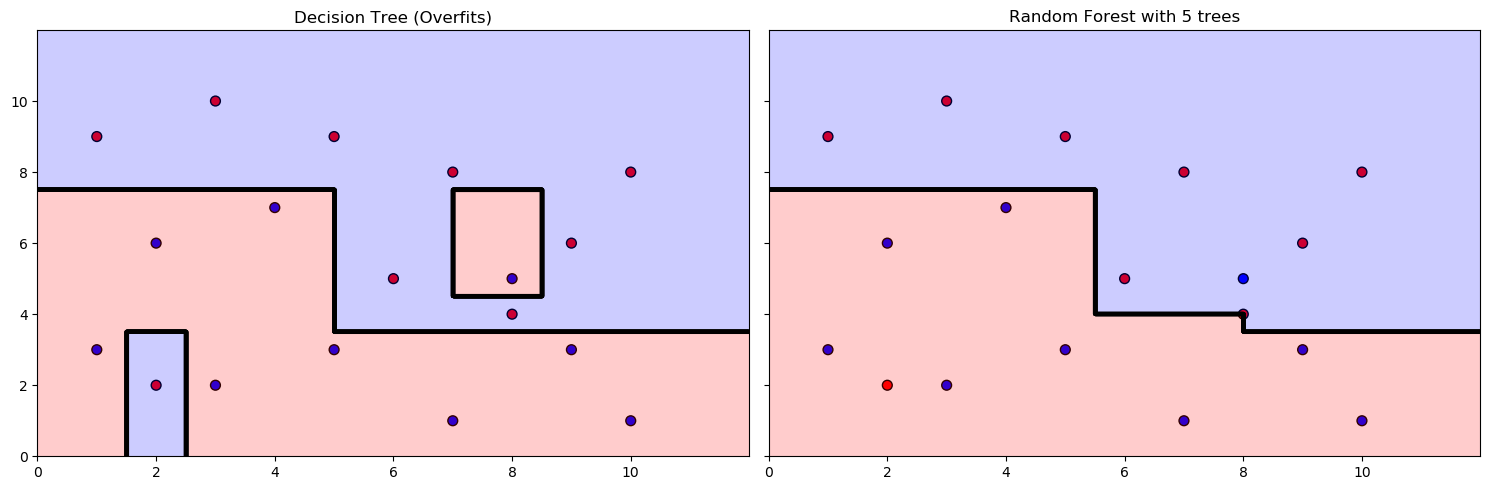

In [72]:
# Create a figure with 3 subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharex=True, sharey=True)

plot_model(features, labels, decesion_tree_classifier, ax=axs[0])
axs[0].set_title('Decision Tree (Overfits)')

plot_model(features, labels, rf_classifier, ax=axs[1])
axs[1].set_title('Random Forest with 5 trees')


plt.tight_layout()
plt.show()

##### Looking into each estimator (weak learner)

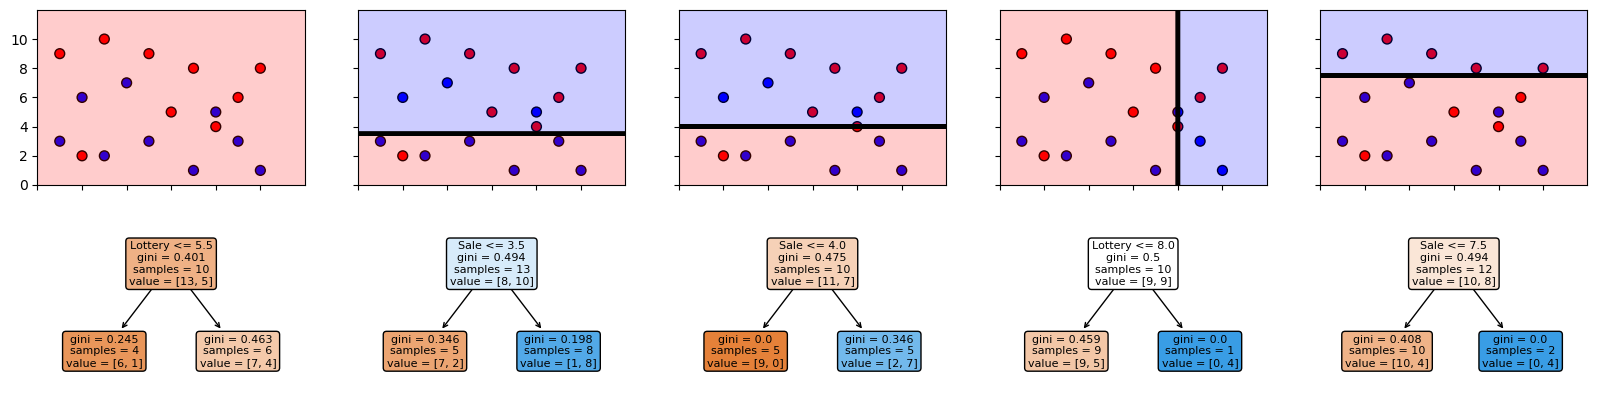

In [91]:
fig, axs = plt.subplots(2, 5, figsize=(20, 5), sharex=True, sharey=True)

for dt in rf_classifier.estimators_:
    tree.plot_tree(dt, rounded=True, ax=axs[1,rf_classifier.estimators_.index(dt)], filled=True, feature_names=features.columns, fontsize=8)
    #plt.show()
    plot_model(features, labels, dt, ax=axs[0,rf_classifier.estimators_.index(dt)])
plt.show()    


### Boosting

#### AdBoost

AdaBoost training accuracy: 0.8888888888888888


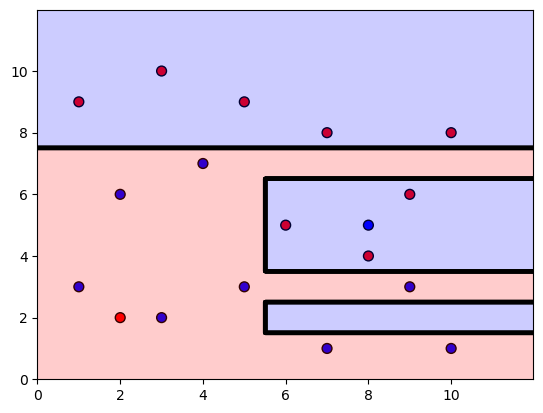

In [85]:
from sklearn.ensemble import AdaBoostClassifier
adb_classifier = AdaBoostClassifier(n_estimators=6, random_state=0)
adb_classifier.fit(features, labels)
print("AdaBoost training accuracy:", adb_classifier.score(features, labels))
plot_model(features, labels, adb_classifier)
plt.show()

##### Looking Inside AdaBoost model

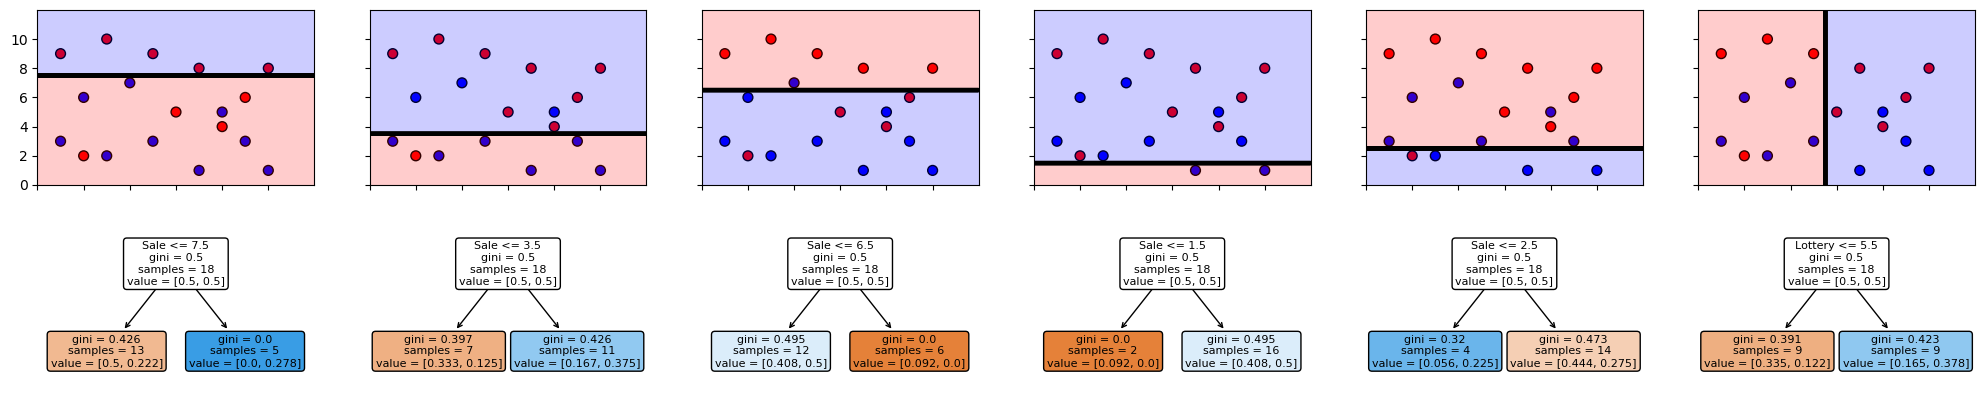

AdaBoost estimator weights: [1. 1. 1. 1. 1. 1.]


In [89]:
fig, axs = plt.subplots(2, 6, figsize=(25, 5), sharex=True, sharey=True)

for dt in adb_classifier.estimators_:
    tree.plot_tree(dt, rounded=True, ax=axs[1,adb_classifier.estimators_.index(dt)], filled=True, feature_names=features.columns, fontsize=8)
    #plt.show()
    plot_model(features, labels, dt, ax=axs[0,adb_classifier.estimators_.index(dt)])
plt.show() 
print( f"AdaBoost estimator weights: {adb_classifier.estimator_weights_}")

#### Gradient Boosting
- One difference between gradient boosting and AdaBoost is that in gradient boosting, we allow decision trees of depth more than 1. 
- Gradient boosting can be used for regression and classification

Gradient Boosting training accuracy: 0.8888888888888888


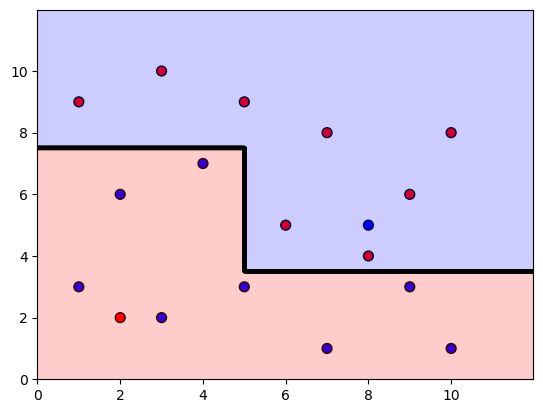

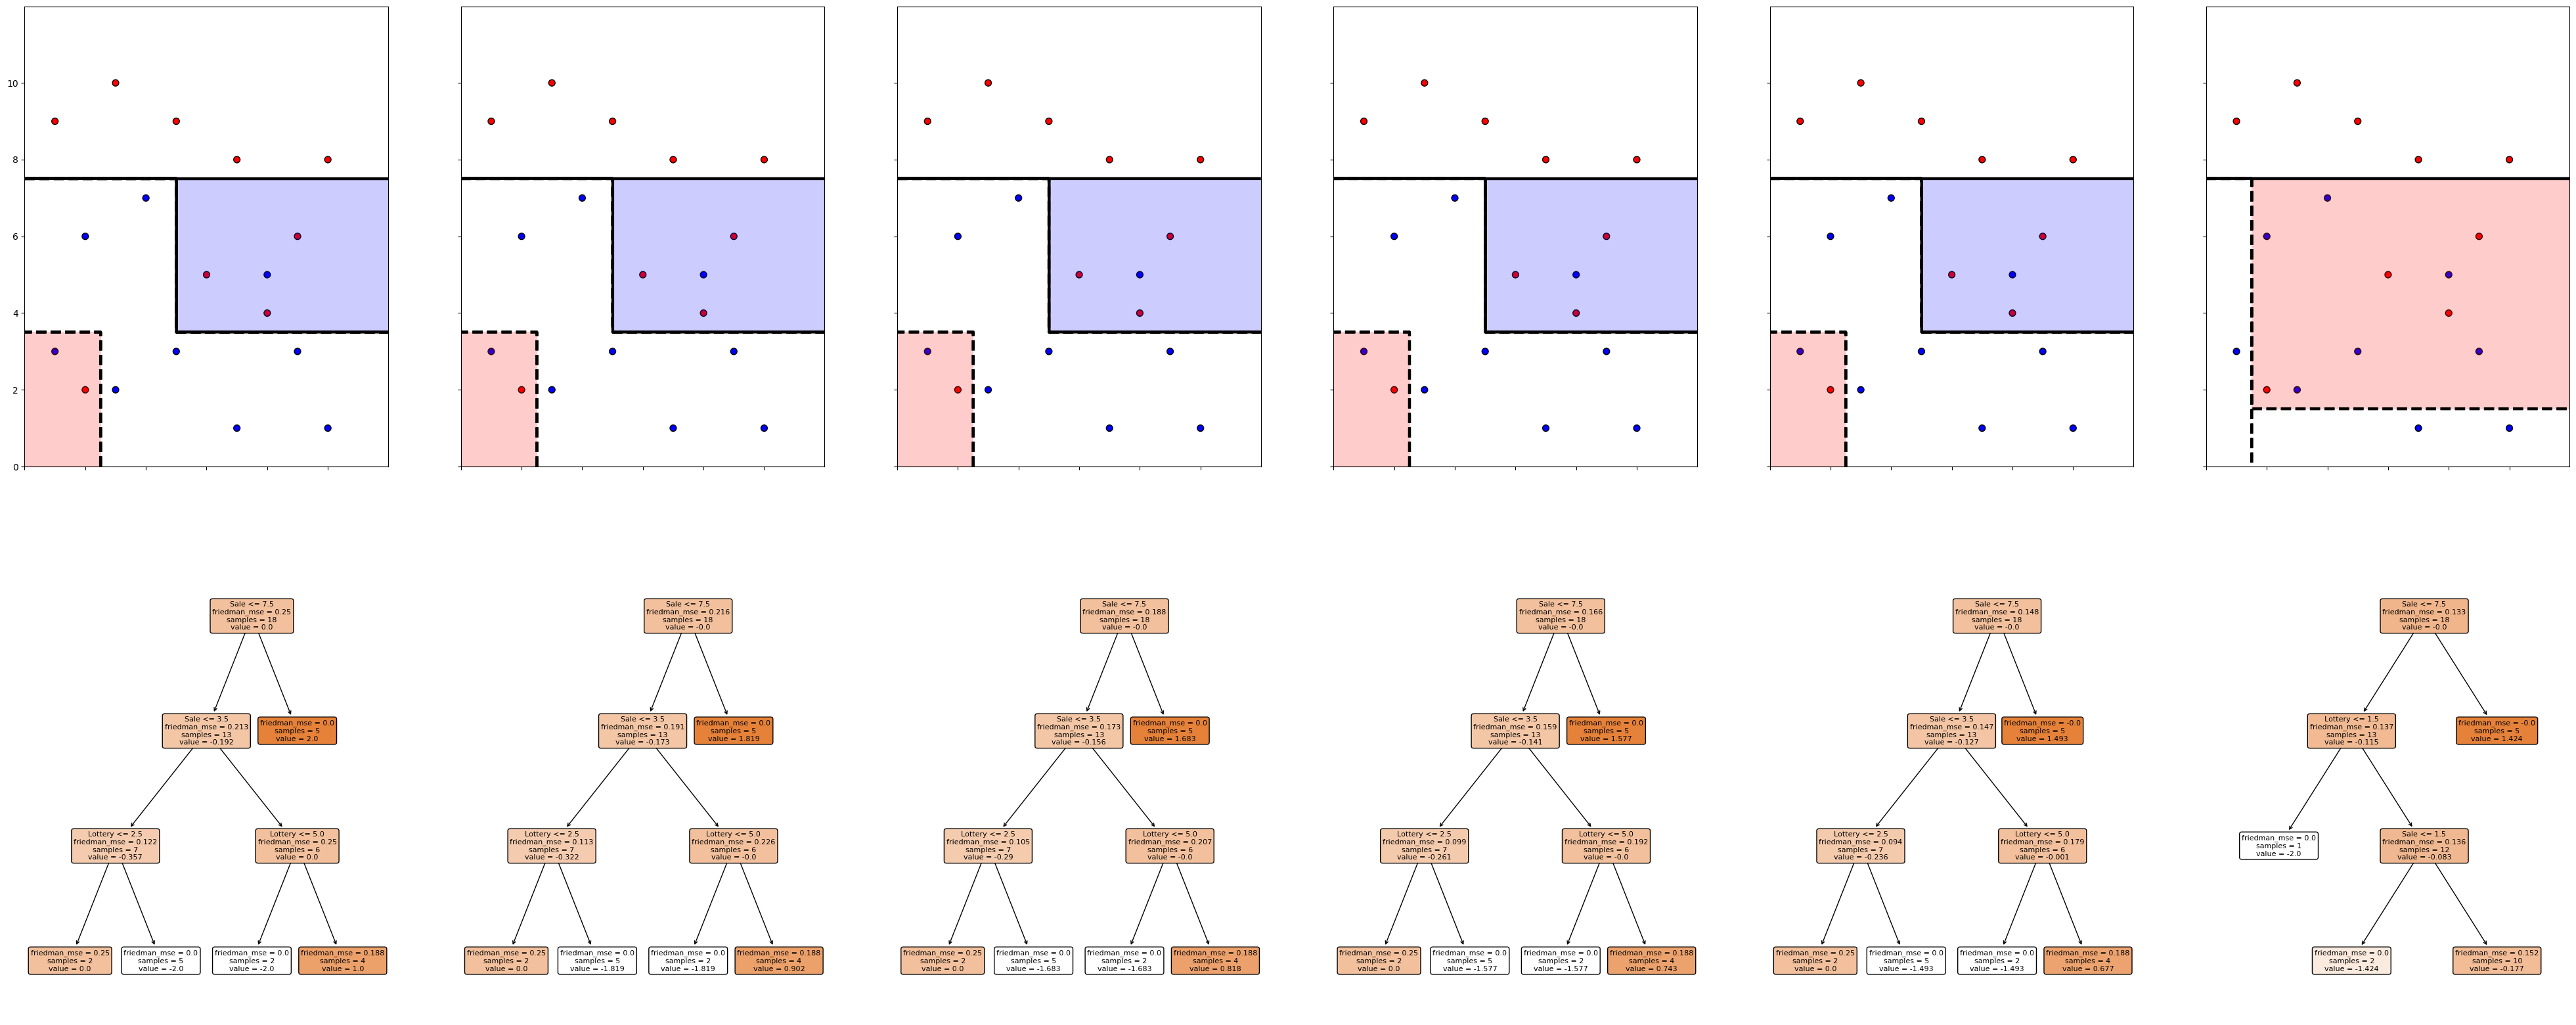

In [101]:
from sklearn.ensemble import GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier(n_estimators=6, random_state=0)
gb_classifier.fit(features, labels)
print("Gradient Boosting training accuracy:", gb_classifier.score(features, labels))
plot_model(features, labels, gb_classifier)
plt.show()

# Create a figure with 3 subplots
fig, axes = plt.subplots(2, 6, figsize=(50, 20), sharex=True, sharey=True)
for dt in gb_classifier.estimators_:
    plot_model(features, labels, dt[0], ax=axes[0,gb_classifier.estimators_.tolist().index(dt)])
    tree.plot_tree(dt[0], rounded=True, ax=axes[1,gb_classifier.estimators_.tolist().index(dt)], filled=True, feature_names=features.columns, fontsize=8)

plt.show()   

#### XGBoost


In [ ]:
%pip install XGBoost

XGBoost training accuracy: 0.8888888888888888


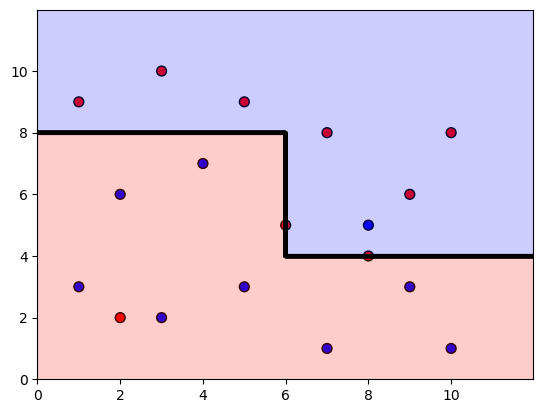

In [106]:
import xgboost
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier(n_estimators=6, random_state=0)
xgb_classifier.fit(features, labels)
print("XGBoost training accuracy:", xgb_classifier.score(features, labels))
plot_model(features, labels, xgb_classifier)
plt.show()

### Regression with Ensemble methods

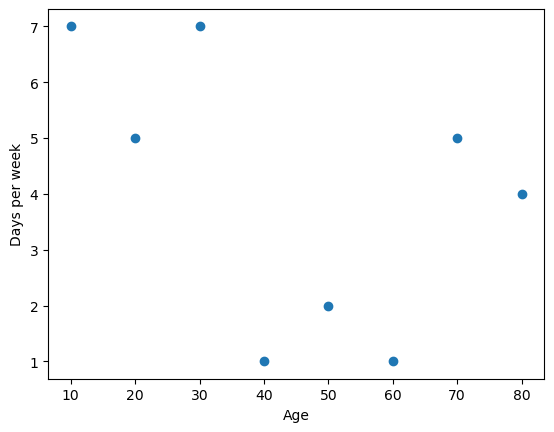

In [108]:
# lets redfine our app usgae data by Age, featue is Age, and label is how many days app is used in a week
# Before we used same data set for some classification by making Age to younger and older groups
features = np.array([[10],[20],[30],[40],[50],[60],[70],[80]])
labels = np.array([7,5,7,1,2,1,5,4])

plt.scatter(features, labels)
plt.xlabel("Age")
plt.ylabel("Days per week")
plt.show()

#### Use a single DecesionTree regressor 

Decision Tree Regressor training R^2: 0.9246031746031746


[Text(0.5, 0.8333333333333334, 'Age <= 35.0\nsquared_error = 5.25\nsamples = 8\nvalue = 4.0'),
 Text(0.25, 0.5, 'Age <= 15.0\nsquared_error = 0.889\nsamples = 3\nvalue = 6.333'),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.0\nsamples = 1\nvalue = 7.0'),
 Text(0.375, 0.16666666666666666, 'squared_error = 1.0\nsamples = 2\nvalue = 6.0'),
 Text(0.75, 0.5, 'Age <= 65.0\nsquared_error = 2.64\nsamples = 5\nvalue = 2.6'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.222\nsamples = 3\nvalue = 1.333'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.25\nsamples = 2\nvalue = 4.5')]

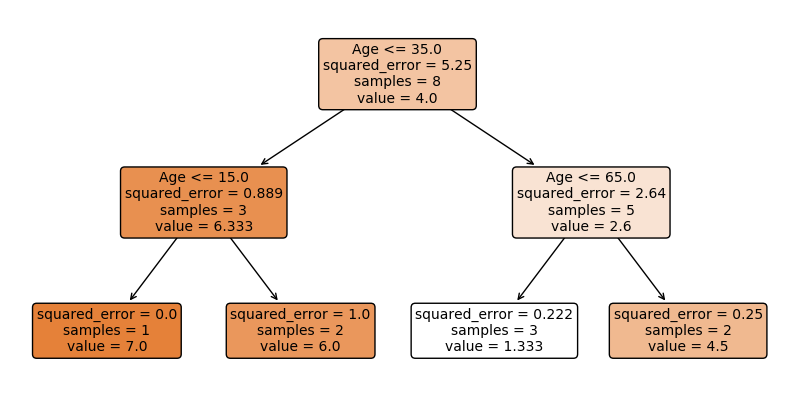

In [125]:
from sklearn.tree import DecisionTreeRegressor
plt.figure(figsize=(10, 5))

dt_regressor = DecisionTreeRegressor(random_state=0, max_depth=2)
dt_regressor.fit(features, labels)
print("Decision Tree Regressor training R^2:", dt_regressor.score(features, labels))
tree.plot_tree(dt_regressor, rounded=True, filled=True, feature_names=["Age"], fontsize=10)


In [122]:
dt_regressor.predict([[25],[55],[66],[75], [80], [90]]) 
# it is predicting how many days app will be used based on age, in this regression any one whose age is greater than 65 will get a prediction of 4.5,
# As we have just one feature and limited data points, once we have more data points and features this will improve

array([6.        , 1.33333333, 4.5       , 4.5       , 4.5       ,
       4.5       ])

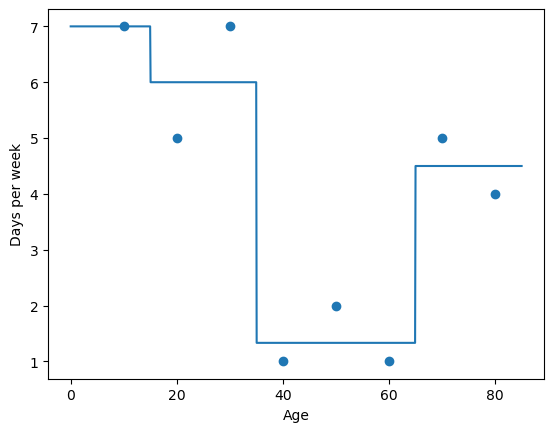

In [126]:
plot_regressor(dt_regressor, features, labels)

#### Gradient boosting

Gradient Boosting Regressor training R^2: 0.9802910476190476


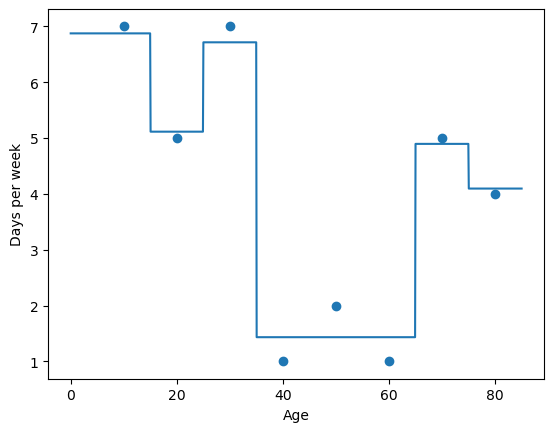

In [147]:
from sklearn.ensemble import GradientBoostingRegressor
#gb_regressor = GradientBoostingRegressor(n_estimators=18, random_state=0, max_depth=2, learning_rate=0.2)
#gb_regressor = GradientBoostingRegressor(n_estimators=36, random_state=0, max_depth=2, learning_rate=0.1)
gb_regressor = GradientBoostingRegressor(n_estimators=4, random_state=0, max_depth=2, learning_rate=0.8)


gb_regressor.fit(features, labels)
print("Gradient Boosting Regressor training R^2:", gb_regressor.score(features, labels))
plot_regressor(gb_regressor, features, labels)

#### Looking inside Gradiant Boosting Model
- analyzing the Gradient Boosting Regressor model by breaking it down into its individual weak learners (decision trees) and examining how they contribute to the overall predictions


In [150]:
predictions_estimators = [] # A list to store the predictions made by each weak learner (decision tree).
predictions = np.zeros(8) # An array initialized to zeros, representing the cumulative predictions made by the ensemble model.
centered_labels = labels-labels.mean() # The labels are centered by subtracting their mean. This is done because gradient boosting starts by predicting the mean of the target values.
residuals = [centered_labels] # A list to store the residuals (errors) at each stage of boosting. Initially, the residuals are the centered labels.

print(f"labels={labels}")
print(f"labels.mean()={labels.mean()}")
print(f"centered_labels={centered_labels}")
print(f"residuals={residuals}")

labels=[7 5 7 1 2 1 5 4]
labels.mean()=4.0
centered_labels=[ 3.  1.  3. -3. -2. -3.  1.  0.]
residuals=[array([ 3.,  1.,  3., -3., -2., -3.,  1.,  0.])]



**************************************************

Weak learner 1
Residuals to predict: [ 3.  1.  3. -3. -2. -3.  1.  0.]
Predictions: [ 3.          2.          2.         -2.66666667 -2.66666667 -2.66666667
  0.5         0.5       ]


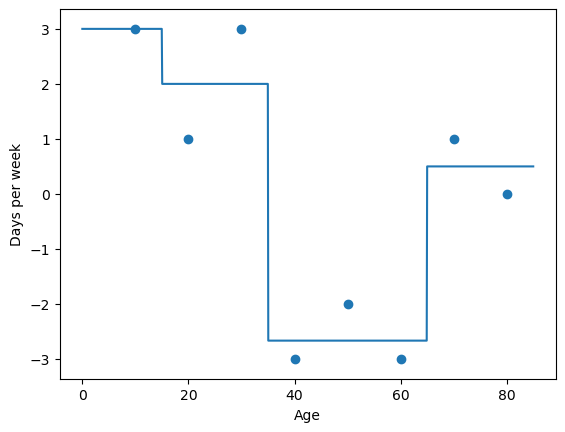

New residuals: [ 0.6        -0.6         1.4        -0.86666667  0.13333333 -0.86666667
  0.6        -0.4       ]

**************************************************

Weak learner 2
Residuals to predict: [ 0.6        -0.6         1.4        -0.86666667  0.13333333 -0.86666667
  0.6        -0.4       ]
Predictions: [ 0.          0.          1.4        -0.53333333 -0.53333333 -0.53333333
  0.1         0.1       ]


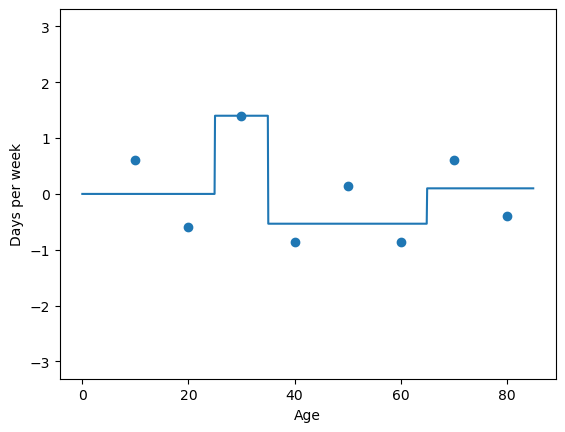

New residuals: [ 0.6  -0.6   0.28 -0.44  0.56 -0.44  0.52 -0.48]

**************************************************

Weak learner 3
Residuals to predict: [ 0.6  -0.6   0.28 -0.44  0.56 -0.44  0.52 -0.48]
Predictions: [ 6.00000000e-01 -6.00000000e-01 -7.40148683e-17 -7.40148683e-17
 -7.40148683e-17 -7.40148683e-17 -7.40148683e-17 -7.40148683e-17]


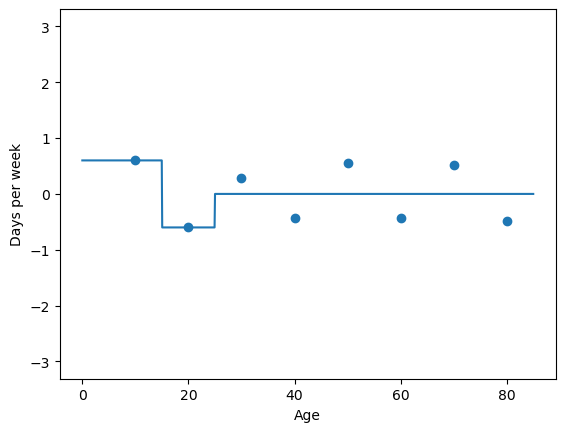

New residuals: [ 0.12 -0.12  0.28 -0.44  0.56 -0.44  0.52 -0.48]

**************************************************

Weak learner 4
Residuals to predict: [ 0.12 -0.12  0.28 -0.44  0.56 -0.44  0.52 -0.48]
Predictions: [-0.00666667 -0.00666667 -0.00666667 -0.00666667 -0.00666667 -0.00666667
  0.52       -0.48      ]


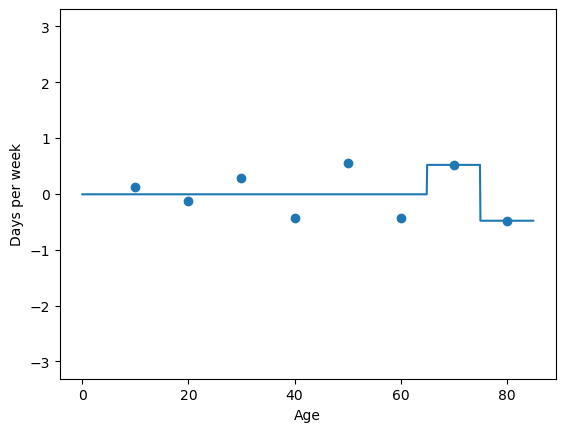

New residuals: [ 0.12533333 -0.11466667  0.28533333 -0.43466667  0.56533333 -0.43466667
  0.104      -0.096     ]


In [151]:

# Loop through each weak learner (decision tree) in the gradient boosting regressor
for i in range(len(gb_regressor.estimators_)):
    weak_learner = gb_regressor.estimators_[i][0]
    print("\n"+"*"*50+"\n")
    print("Weak learner", i+1)
    preds = weak_learner.predict(features) # The weak learner makes predictions on the input features.
    predictions_estimators.append(preds) # The predictions made by the weak learner are stored in the predictions_estimators list.
    print("Residuals to predict:", residuals[-1])
    print("Predictions:", preds)
    predictions += preds*0.8
    #plt.scatter(features, predictions)
    #plt.scatter(features, residuals[-1])
    #plot_regressor(tree[0], features, centered_labels)
    plt.scatter(features, centered_labels, color='white')
    plot_regressor(weak_learner, features, residuals[-1])
    plt.show()
    residuals.append(centered_labels-predictions)
    print("New residuals:", residuals[-1])